In [638]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [639]:
day_data = pd.read_csv('day.csv')
day_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [640]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [641]:
#Check for null
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<H2> Data Clean Up </H2>

In [642]:
# Remove Instant column because its just a serial number
# Remove date column since we already have other columns like year, month, weekday and holiday
# As the model needs to be built on cnt column, we can drop casual & registered
day_data = day_data.drop(['dteday', 'instant', 'casual','registered'],axis =1)

In [643]:
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [644]:
#Converting season and weathersit to categorical string values
day_data['weathersit']=day_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow or Rain',4:'Heavy Snow or Rainy'})
day_data['season']=day_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
#correcting wrong weekday and weekend data to Sunday - 0 to Saturday - 6
#day_data['weekday']=day_data.weekday.map({6: 1, 0: 2, 1: 3, 2: 4, 3: 5, 4: 6, 5: 7 })
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist + Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist + Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


<H2>Visualization</H2>

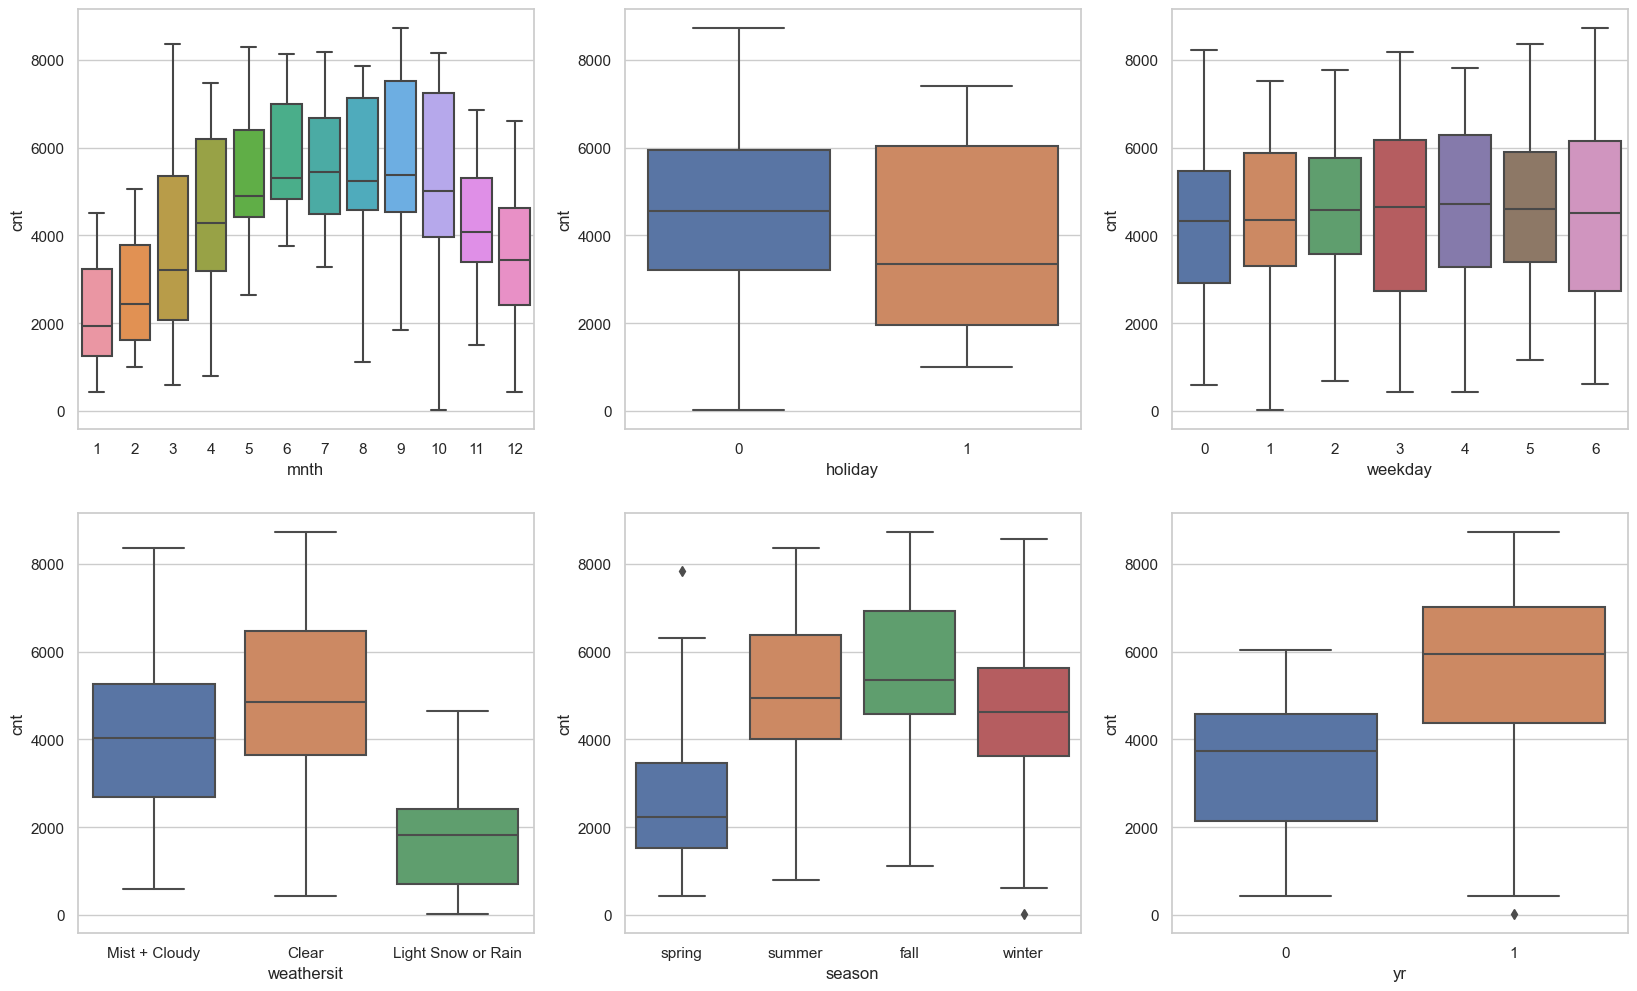

In [645]:
# Visualize categorical variables
def boxplot(categorical,target):
    plt.figure(figsize=(20, 12))
    for i in range(0,len(categorical)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = categorical[i], y = target, data = day_data)
    plt.show()
    
categorical =['mnth','holiday','weekday','weathersit', 'season','yr']
boxplot(categorical,'cnt')

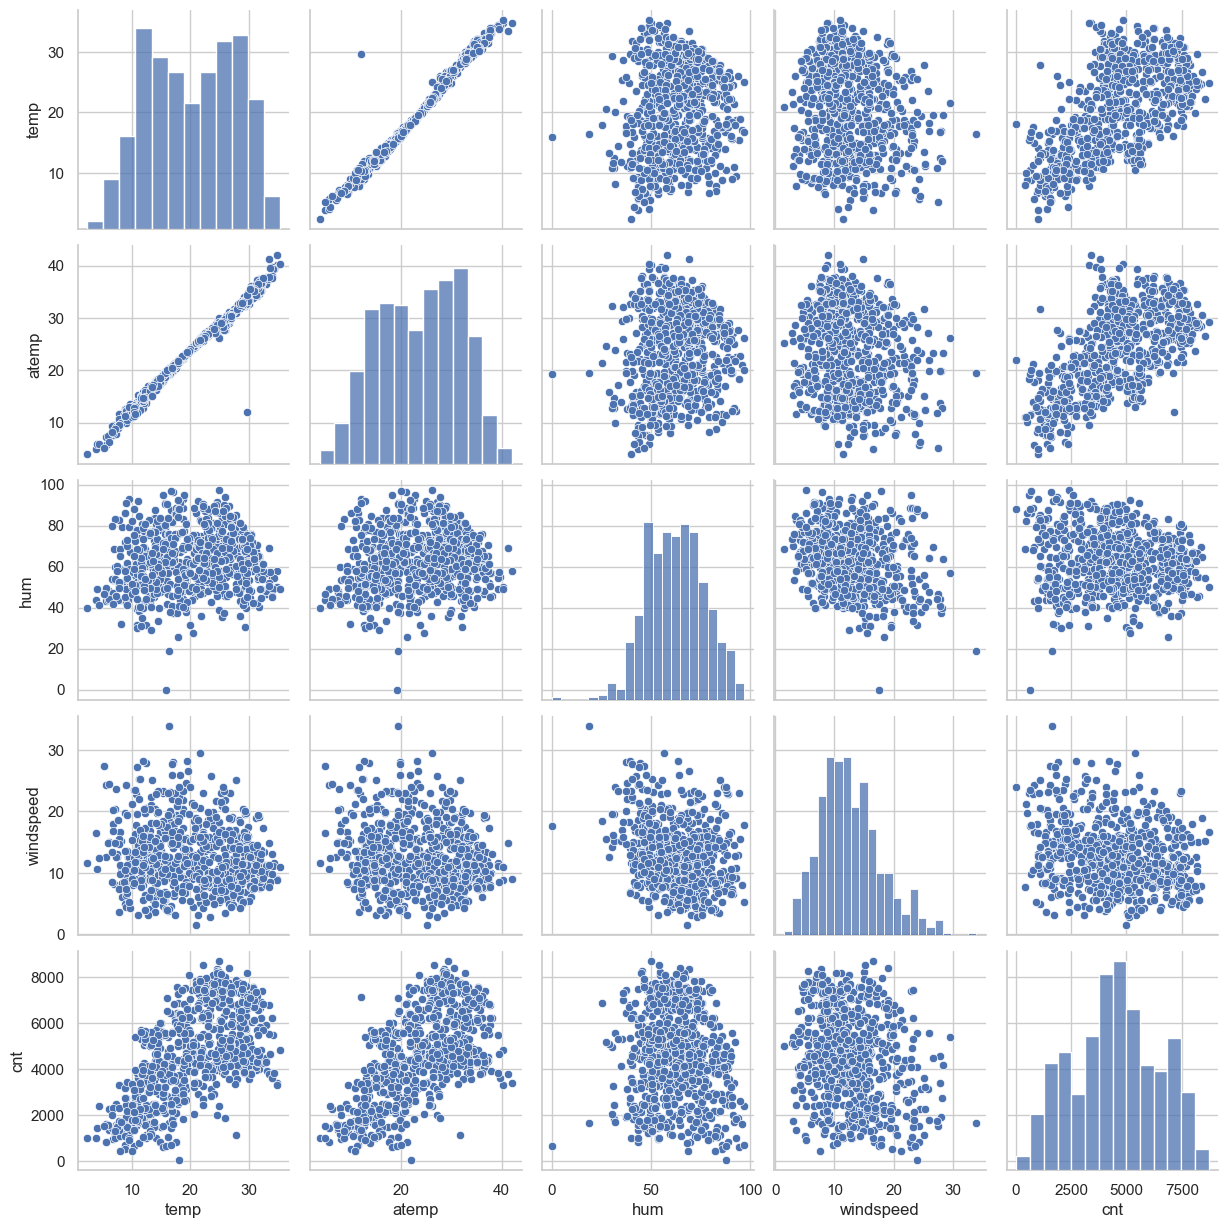

In [646]:
# Visualize numeric variables

sns.pairplot(data=day_data, vars=['temp', 'atemp', 'hum','windspeed', 'cnt'])
plt.show()

<H2>Data Preparation</H2>

In [647]:
day_data['mnth']=day_data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day_data.mnth.value_counts(normalize=True)

mnth
Jan     0.084932
Mar     0.084932
May     0.084932
July    0.084932
Aug     0.084932
Oct     0.084932
Dec     0.084932
Apr     0.082192
June    0.082192
Sep     0.082192
Nov     0.082192
Feb     0.076712
Name: proportion, dtype: float64

In [648]:
day_data.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
day_data.weekday.value_counts(normalize=True)

weekday
Saturday     0.143836
Sunday       0.143836
Monday       0.143836
Tuesday      0.142466
Thursday     0.142466
Friday       0.142466
Wednesday    0.141096
Name: proportion, dtype: float64

In [649]:
month = pd.get_dummies(day_data['mnth'], drop_first = True, dtype='int')
weekday = pd.get_dummies(day_data['weekday'], drop_first = True, dtype='int')
season = pd.get_dummies(day_data['season'], drop_first = True, dtype='int')
weathersit = pd.get_dummies(day_data['weathersit'], drop_first = True, dtype='int')
weathersit.head()

,Light Snow or Rain,Mist + Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [650]:
day_model_data= pd.concat([day_data,season,weathersit,month,weekday],axis=1)
day_model_data.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)
day_model_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


<h2>Splitting Data and Scaling</h2>

In [651]:
day_model_train, day_model_test = train_test_split(day_model_data, train_size = 0.7, test_size = 0.3, random_state = 100)
day_model_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,1,0,0,0,0


In [652]:
#Scaling numeric variables
scaler = MinMaxScaler()

In [653]:
numeric_vars = ['temp','atemp','hum','windspeed','cnt']
day_model_train[numeric_vars] = scaler.fit_transform(day_model_train[numeric_vars])
day_model_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


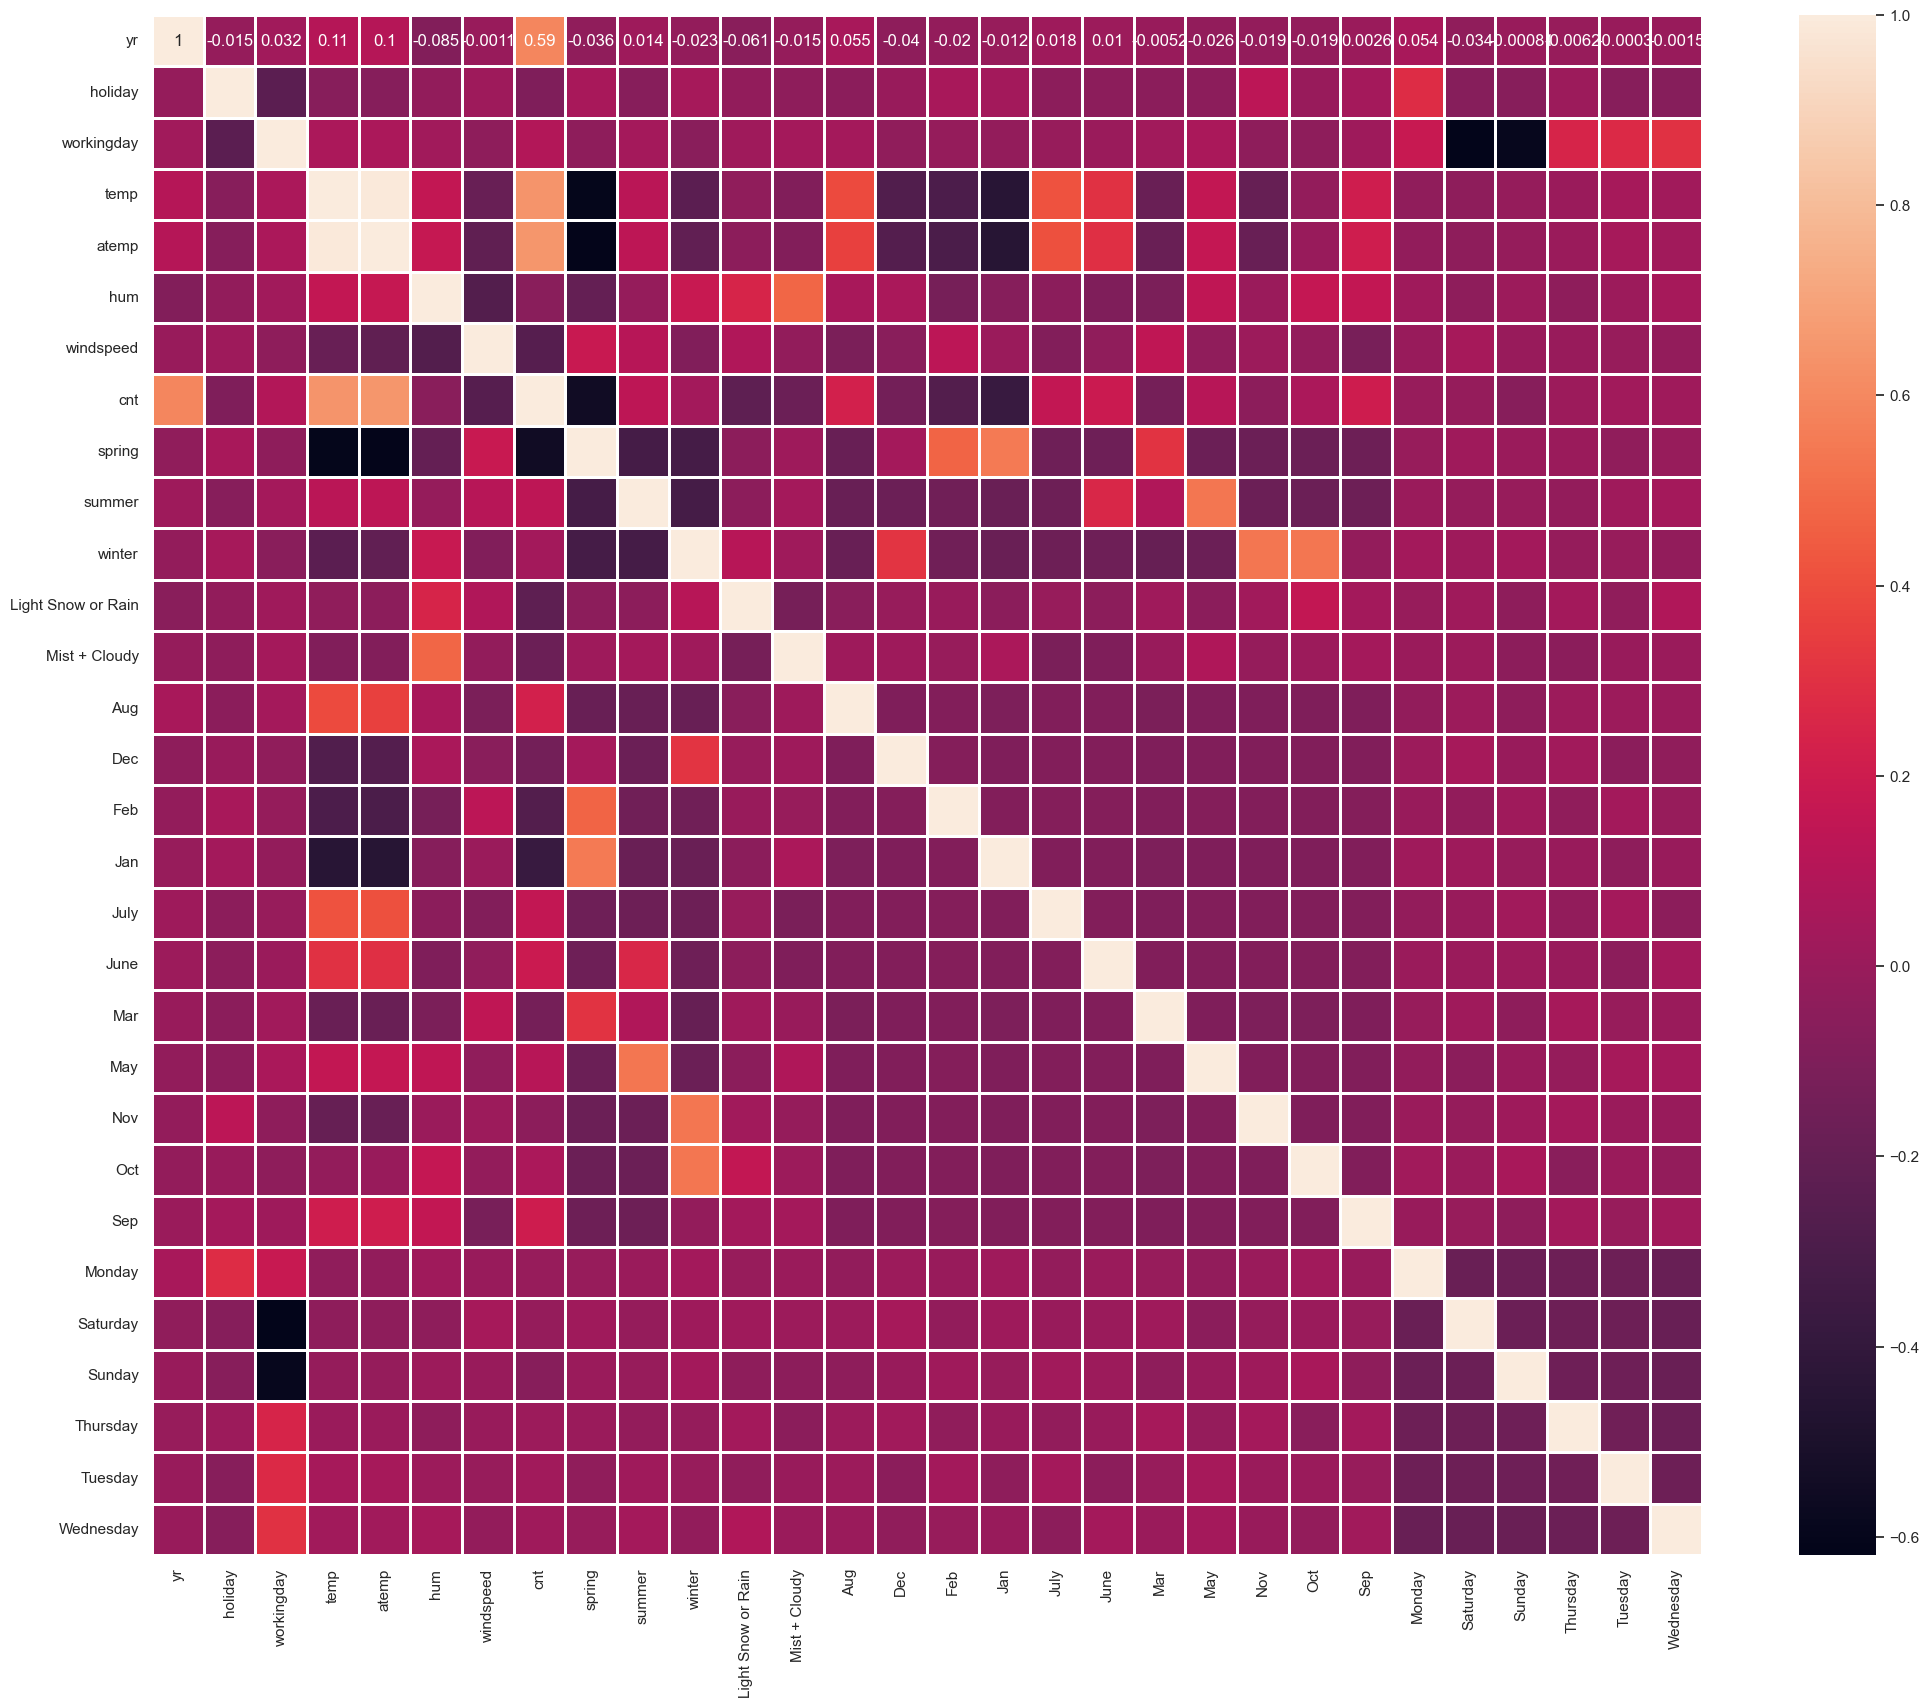

In [654]:
plt.figure(figsize = (25,20))
ax= sns.heatmap(day_model_train.corr(), annot = True,linewidth =1)
plt.show()

<H2>Building Linear Regression Model</H2>

In [655]:
#Dividing X and Y
#day_model_train.info()
y_train = day_model_train.pop('cnt')
X_train = day_model_train

In [656]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [657]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow or Rain', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 12),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 10),
 ('Wednesday', False, 14)]

In [658]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Light Snow or Rain', 'Mist + Cloudy', 'July',
       'Sep', 'Saturday', 'Sunday'],
      dtype='object')

In [659]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [660]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [661]:
#Train Model
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.13e-191
Time:                        12:51:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1989      0

In [662]:
#Dropping Holidays due to high P value
X_train_mod2 = X_train_rfe.drop(["holiday"], axis = 1)
X_train_mod2 = sm.add_constant(X_train_mod2)
lm2 = sm.OLS(y_train,X_train_mod2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.13e-191
Time:                        12:51:22   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1799      0

In [663]:
# Calculate the VIFs for the model2
X_train_mod2 = X_train_mod2.drop(['const'], axis=1)
calculateVIF(X_train_mod2)

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
12,Saturday,4.91
4,windspeed,4.90
5,spring,4.80
13,Sunday,4.76
7,winter,3.71
6,summer,3.03
9,Mist + Cloudy,2.31


In [664]:
#Dropping hum due to high VIF value
X_train_mod3 = X_train_mod2.drop(["hum"], axis = 1)
X_train_mod3 = sm.add_constant(X_train_mod3)
lm3 = sm.OLS(y_train,X_train_mod3).fit()   # Running the linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          5.73e-189
Time:                        12:51:23   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1005      0

In [665]:
# Calculate the VIFs for the model3
X_train_mod3 = X_train_mod3.drop(['const'], axis=1)
calculateVIF(X_train_mod3)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
11,Saturday,4.45
12,Sunday,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
9,July,1.60


In [666]:
#Dropping hum due to high VIF value
X_train_mod4 = X_train_mod3.drop(["Sunday"], axis = 1)
X_train_mod4 = sm.add_constant(X_train_mod4)
lm4 = sm.OLS(y_train,X_train_mod4).fit()   # Running the linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          3.28e-189
Time:                        12:51:23   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1493      0

In [667]:
# Calculate the VIFs for the model4
X_train_mod4 = X_train_mod4.drop(['const'], axis=1)
calculateVIF(X_train_mod4)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
11,Saturday,1.83
9,July,1.58
8,Mist + Cloudy,1.56


In [668]:
X_train_mod5 = X_train_mod4.drop(["spring", "July"], axis = 1)
X_train_mod5 = sm.add_constant(X_train_mod5)
lm5 = sm.OLS(y_train,X_train_mod5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 19 Nov 2023   Prob (F-statistic):          1.47e-188
Time:                        12:51:23   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0753      0

In [669]:
# Calculate the VIFs for the model5
calculateVIF(X_train_mod5)

,Features,VIF
0,const,20.87
2,workingday,1.64
10,Saturday,1.63
3,temp,1.20
6,winter,1.20
5,summer,1.19
9,Sep,1.10
4,windspeed,1.09
7,Light Snow or Rain,1.05
8,Mist + Cloudy,1.04


<H2>Residual Analysis</H2>


In [670]:
y_train_count = lm5.predict(X_train_mod5)

Text(0.5, 0, 'Errors')

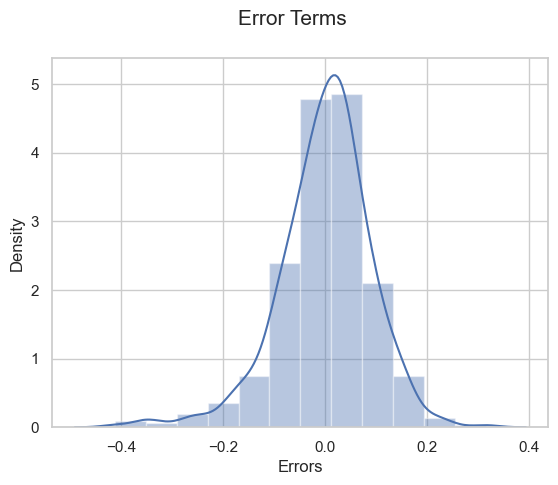

In [671]:
# Plot error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 12)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('Errors', fontsize = 12) 

<h2> Making Predictions</h2>

In [672]:
#Scaling test data
numeric_vars = ['temp','atemp','hum','windspeed','cnt']
day_model_test[numeric_vars] = scaler.fit_transform(day_model_test[numeric_vars])
day_model_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,0,0,1,0,0


In [673]:
# Creating X_test_new dataframe by dropping variables from X_test
columns = list(X_train_mod5.columns)
columns.pop(0)
columns
X_test_new = day_model_test[columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [674]:
# Making predictions
y_pred = lm5.predict(X_test_new)

In [675]:
y_test = day_model_test.pop('cnt')

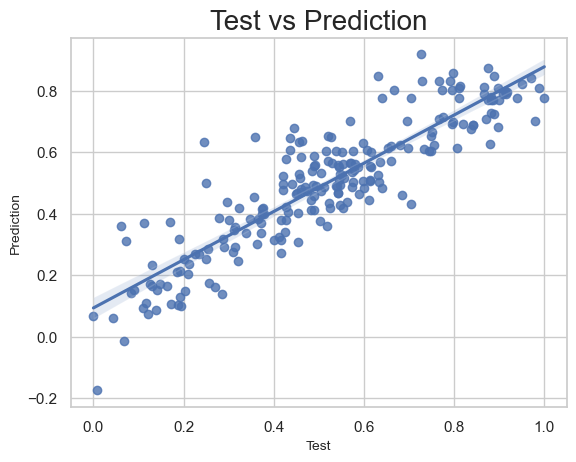

In [676]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, fit_reg=True)
plt.title('Test vs Prediction', fontsize=20)             
plt.xlabel('Test', fontsize=10)                        
plt.ylabel('Prediction', fontsize=10)                         
plt.show()

In [677]:
r2 = round(r2_score(y_test, y_pred),4)
r2

0.788

In [678]:
# n is number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7767

In [679]:
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1096

In [680]:
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0857

In [681]:
lm5.params.sort_values(ascending = False)

temp                  0.549936
yr                    0.233056
winter                0.131826
Sep                   0.097236
summer                0.087429
const                 0.075325
Saturday              0.067688
workingday            0.056323
Mist + Cloudy        -0.081347
windspeed            -0.155238
Light Snow or Rain   -0.288021
dtype: float64

<h2>Conclusions</h2>

As per the parameters listed above, equation of our best fitted line is as below

$cnt= 0.075325 + 0.233056 \times yr + 0.056323 \times workingday + 0.549936 \times temp + -0.155238 \times windspeed + 0.087429 \times summer + 0.131826 \times winter + -0.288021 \times Light Snow or Rain + -0.081347 \times Mist + Cloudy + 0.097236 \times Sep + 0.067688 \times Saturday$

<table>
<tr><th>Test/Train<th><th>R^2<th><th>Adjusted R^2<tr><tr>
<tr><td>Train<td><td> 0.836 <td><td> 0.832 <td><tr><table>
<tr><td>Test<td><td> 0.788 <td><td> 0.7767 <td><tr><table>